# Test player-wise Metropolis sampling with a lower scaling factor for the logistic function.

This will result in the prior becoming less informative.

## Setup

In [1]:
import os
import sys

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import load, munge
import src.models.gp

In [3]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

## Load data.

In [4]:
matches = load.all_matches_df()

In [6]:
matches_ti9 = matches.loc[matches.league_name == "The International 2019"]
matches_ti9.shape

(268, 15)

In [7]:
players_mat_ti9 = munge.make_match_players_matrix(
    matches_ti9.radiant_players, matches_ti9.dire_players)
players_mat_ti9.shape

(268, 240)

## Get a list of player IDs.

In [8]:
players = munge.player_id_to_player_name(
    pd.concat([matches_ti9.radiant_players, matches_ti9.dire_players]),
    pd.concat([matches_ti9.radiant_nicknames, matches_ti9.dire_nicknames]),
    pd.concat([matches_ti9.radiant_valveId, matches_ti9.dire_valveId]),
    pd.concat([matches_ti9.radiant_name, matches_ti9.dire_name]),)

In [9]:
players.loc[players_mat_ti9.columns[:5]]

,name,team,team_id
3916428,EGM,Bald,7237270
3940262,March,Team Jinesbrus,7225724
4281729,syndereN,Anti-MagE-,7247587
6922000,pieliedie,Forward Gaming,6214538
10366616,Sneyking,Forward Gaming,6214538


## Run model manually.

In [14]:
two_years_in_ms = 2 * 365 * 24 * 60 * 60 * 1000

In [27]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

In [28]:
gp = src.models.gp.SkillsGP(players_mat_ti9.values,
                            matches_ti9.startTimestamp,
                            matches_ti9.radiantVictory,
                            players_mat_ti9.columns.values,
                            "exponential", {"scale": two_years_in_ms},
                            propose_sd=0.1, logistic_scale=1,
                            save_every_n_iter=10)

In [29]:
gp.iterate_once_player_wise()

In [30]:
gp.samples

[(0, array([0., 0., 0., ..., 0., 0., 0.]), 0.0, 7211.5372555225085)]

In [31]:
for i in range(5):
    display(src.models.gp._dropna(gp.skills_vec_to_mat(gp._cur_skills)[:, i]))

array([-0.01722965, -0.01678793, -0.01549047, -0.01258439, -0.00953557,
       -0.00923745, -0.00965323])

array([-0.062492  , -0.06143534, -0.0603985 , -0.05950983, -0.06029104,
       -0.05880158, -0.05964436, -0.06061273, -0.05590702, -0.0572523 ,
       -0.0557561 , -0.05642141, -0.05945327, -0.05781343, -0.05738206,
       -0.0513145 , -0.05285809, -0.05308138, -0.05297698])

array([0.06850588, 0.06837744, 0.0668403 , 0.06684858, 0.06903103,
       0.07140989, 0.07104668, 0.07175442, 0.07038804])

array([-0.03888771, -0.04051589, -0.04053406, -0.03949413, -0.03877813,
       -0.03926086, -0.04136228, -0.04124387, -0.03174081, -0.03213947,
       -0.03193352, -0.03067916, -0.02944818, -0.02914315, -0.03128223])

array([-0.06675265, -0.06785375, -0.06697108, -0.0679792 , -0.07151361,
       -0.07359415, -0.07280677, -0.07087218, -0.07020017, -0.07082491,
       -0.06859249, -0.0678687 , -0.06610707, -0.06634207, -0.06861719])

### 100 player-wise iterations.

In [32]:
gp.iterate(100, "playerwise")

100% (100 of 100) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


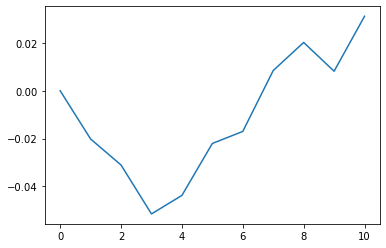

In [33]:
plt.plot([x[2] for x in gp.samples])

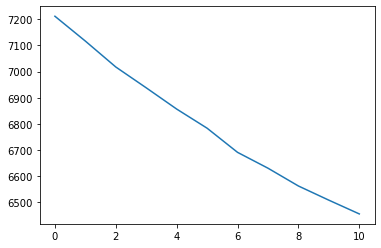

In [35]:
plt.plot([x[3] for x in gp.samples])

In [39]:
[[x[0], x[2], x[4], x[5]] for x in gp.samples[1:]]

[[10, -0.020164498200950204, 7288.913754949696, -172.31121406208447],
 [20, -0.031046296370844207, 7188.849031482982, -171.21872711680035],
 [30, -0.051488262519943304, 7101.534451331375, -163.51146442204893],
 [40, -0.04375614400698704, 7015.125693518705, -158.2543744011993],
 [50, -0.022032213221862884, 6939.780035557639, -156.07473576575114],
 [60, -0.017002569128656574, 6844.96232498225, -153.55511751203647],
 [70, 0.008451824900778702, 6784.213097262557, -153.35441678500231],
 [80, 0.02019721497641286, 6721.616195879074, -158.76631292460021],
 [90, 0.00816736440988938, 6661.396415066413, -152.73021457826925],
 [100, 0.03115217904195907, 6610.564760774077, -154.44341810933003]]

### 1,000 iterations.

In [40]:
gp.iterate(1000, "playerwise")

100% (1000 of 1000) |####################| Elapsed Time: 0:02:53 Time:  0:02:53


In [41]:
[[x[0], x[3], x[4], x[5]] for x in gp.samples[-10:]]

[[1010, 5902.748897810273, 6059.872080220833, -157.12318241055954],
 [1020, 5881.957682700726, 6038.298864319911, -156.34118161918553],
 [1030, 5878.294940474873, 6035.15408159559, -156.859141120716],
 [1040, 5884.057954307457, 6041.881136435932, -157.82318212847406],
 [1050, 5842.78911571087, 6004.566734051039, -161.77761834016945],
 [1060, 5845.110614149274, 5999.334116768515, -154.22350261924137],
 [1070, 5826.603068990791, 5984.151790866735, -157.54872187594387],
 [1080, 5809.309466617414, 5969.5854343354595, -160.275967718046],
 [1090, 5809.017833218542, 5964.449772716395, -155.4319394978525],
 [1100, 5812.446140724692, 5969.61017155418, -157.1640308294882]]

In [42]:
gp.samples[-1]

(1100, array([1.17284563, 1.60141112, 0.86922007, ..., 0.73327749, 1.50880665,
        0.68988767]), 0.02403649402836743, 5812.446140724692, 5969.61017155418, -157.1640308294882)

Text(0.5, 1.0, 'Radiant advantage')

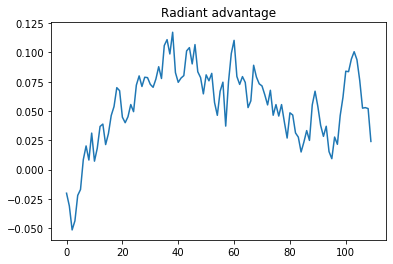

In [45]:
plt.plot([x[2] for x in gp.samples[1:]])
plt.title("Radiant advantage")

6031.464347448102

Text(0.5, 1.0, 'log-posterior')

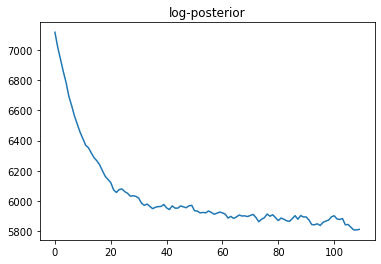

In [46]:
display(np.mean([x[3] for x in gp.samples[1:]]))
plt.plot([x[3] for x in gp.samples[1:]])
plt.title("log-posterior")

## What are skill levels after fitting?

In [47]:
samples = [gp.skills_vec_to_mat(x[1]) for x in gp.samples[20:]]

In [48]:
skills = pd.DataFrame(
    np.mean(samples, axis=0),
    columns=pd.MultiIndex.from_arrays(
        [players.loc[players_mat_ti9.columns, "team"],
        players.loc[players_mat_ti9.columns, "name"]])
)

In [49]:
skills

team Bald Team Jinesbrus Anti-MagE- Forward Gaming           Team Spirit  \
name  EGM          March   syndereN      pieliedie  Sneyking     VANSKOR   
0     NaN            NaN        NaN       0.784757  0.631917         NaN   
1     NaN            NaN        NaN       0.781355  0.621090         NaN   
2     NaN            NaN        NaN       0.786522  0.616538         NaN   
3     NaN            NaN        NaN       0.786608  0.612480         NaN   
4     NaN            NaN        NaN            NaN       NaN         NaN   
5     NaN            NaN        NaN            NaN       NaN         NaN   
6     NaN            NaN        NaN            NaN       NaN         NaN   
7     NaN            NaN        NaN            NaN       NaN         NaN   
8     NaN            NaN        NaN            NaN       NaN         NaN   
9     NaN            NaN        NaN            NaN       NaN         NaN   
10    NaN            NaN        NaN            NaN       NaN         NaN   
11    NaN            NaN        NaN            NaN       NaN         NaN   
12    NaN            NaN        NaN            NaN       NaN         NaN   
13    NaN            NaN        NaN            NaN       NaN         NaN   
14    NaN            NaN        NaN            NaN       NaN         NaN   
15    NaN            NaN        NaN            NaN       NaN         NaN   
16    NaN            NaN        NaN            NaN       NaN         NaN   
17    NaN            NaN        NaN            NaN       NaN         NaN   
18    NaN            NaN        NaN            NaN       NaN         NaN   
19    NaN            NaN        NaN            NaN       NaN         NaN   
20    NaN            NaN        NaN            NaN       NaN         NaN   
21    NaN            NaN        NaN            NaN       NaN         NaN   
22    NaN            NaN        NaN       0.832356  0.602941         NaN   
23    NaN            NaN        NaN       0.831039  0.601343         NaN   
24    NaN            NaN        NaN            NaN       NaN         NaN   
25    NaN            NaN        NaN       0.831215  0.616427         NaN   
26    NaN            NaN        NaN            NaN       NaN         NaN   
27    NaN            NaN        NaN       0.821864  0.624107         NaN   
28    NaN            NaN        NaN            NaN       NaN         NaN   
29    NaN            NaN        NaN            NaN       NaN         NaN   
..    ...            ...        ...            ...       ...         ...   
238   NaN            NaN        NaN            NaN       NaN         NaN   
239   NaN            NaN        NaN            NaN       NaN   -0.524269   
240   NaN            NaN        NaN            NaN       NaN         NaN   
241   NaN            NaN        NaN            NaN       NaN         NaN   
242   NaN            NaN        NaN            NaN       NaN         NaN   
243   NaN            NaN        NaN            NaN       NaN   -0.519521   
244   NaN            NaN        NaN            NaN       NaN         NaN   
245   NaN            NaN        NaN            NaN       NaN         NaN   
246   NaN            NaN        NaN            NaN       NaN         NaN   
247   NaN            NaN        NaN            NaN       NaN         NaN   
248   NaN            NaN        NaN            NaN       NaN         NaN   
249   NaN            NaN        NaN            NaN       NaN         NaN   
250   NaN       0.218601        NaN            NaN       NaN         NaN   
251   NaN            NaN        NaN            NaN       NaN         NaN   
252   NaN            NaN        NaN            NaN       NaN   -0.534329   
253   NaN            NaN        NaN            NaN       NaN         NaN   
254   NaN            NaN        NaN            NaN       NaN         NaN   
255   NaN            NaN        NaN            NaN       NaN         NaN   
256   NaN       0.220919        NaN            NaN       NaN         NaN   
257   NaN            NaN        NaN            N

In [50]:
skills.mean().sort_values()

team                 name           
Team Sirius          InJuly            -1.592361
AMPLFY               Jeyo              -1.515258
paiN Gaming          Thiolicor         -1.313480
Old Suck Gaming      B                 -1.297212
Team Spirit          velheor           -1.282314
Team Xolotl          esK               -1.176236
Furia                mini-`            -1.114593
RESURGENCE           Deth              -1.106485
Old Suck Gaming      Virsatus          -1.017925
EHOME                Ferrari_430       -0.976735
compLexity Gaming    Meracle           -0.969549
RESURGENCE           keeeeeeeeepo      -0.951216
Furia                Duster            -0.946404
Team Singularity     Miposhka          -0.910782
Team Xolotl          hector            -0.895828
Mineski              raging-_-potato   -0.872176
Bald                 SexyBamboe        -0.865330
Black Sheep!         Boris             -0.852327
SG e-sports          BL7K.Sexyfat      -0.851131
Team EVOS            Whitemon   

In [51]:
skills.mean().sort_values().reset_index().groupby("team").sum().sort_values(0, ascending=False)

,0
team,
Forward Gaming,2.768053
Infamous Gaming,1.865179
Vega Squadron,1.654610
CDEC,1.536170
Chaos Esports Club,1.530772
Royal Never Give Up,1.379262
Natus Vincere,1.329525
J.Storm,1.260689
Mineski,1.001611


In [55]:
src.models.gp.win_prob(2.768053 - 0.985228, 1)

0.8560453457742657

### Visualise variance.

In [56]:
idx1 = skills.columns.get_level_values("team") == "Infamous Gaming"

In [57]:
idx2 = skills.columns.get_level_values("team") == "paiN Gaming"

Text(0.5, 1.0, 'Infamous Gaming')

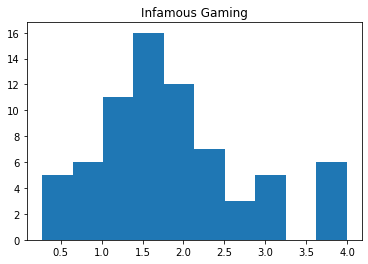

In [60]:
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1)) for x in samples[20:]])
plt.title("Infamous Gaming")

Text(0.5, 1.0, 'paiN Gaming')

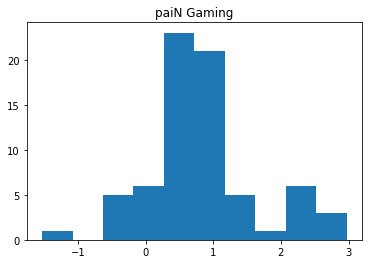

In [61]:
plt.hist([np.nanmean(np.sum(x[:, idx2], axis=1)) for x in samples[20:]])
plt.title("paiN Gaming")

1.027339789671198

Text(0.5, 1.0, 'Infamous vs paiN Gaming')

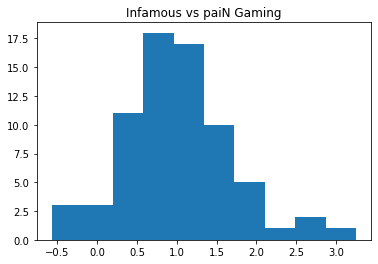

In [62]:
display(np.mean([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]]))
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]])
plt.title("Infamous vs paiN Gaming")

## Play with some win probabilities.

In [65]:
src.models.gp.win_prob(2, 1)

0.8807970779778823